In [1]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('datasets/crimedata2.csv')
df.head(3)

,Ecommunityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumKidsBornNeverMar,PctKidsBornNeverMar,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,OwnOccQrange,RentLowQ,RentMedian,RentHighQ,RentQrange,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,murders,murdPerPop,rapes,rapesPerPop,robberies,robbbPerPop,assaults,assaultPerPop,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,11980,100.0,75122,89.24,1.55,70.20,23.62,1.03,18.39,79584,29711,30233,13600,5725,27101,5115,22838,227,1.96,5.81,9.90,48.18,2.70,64.55,14.65,28.82,5.49,50.73,3.67,26.38,5.22,4.47,3.22,91.43,90.17,95.78,95.81,44.56,58.88,31,0.36,1277,8.69,13.00,20.99,30.93,0.93,1.39,2.24,3.30,85.68,1.37,4.81,4.17,2.99,3.00,2.84,91.46,0.39,11.06,3,64,98.37,91.01,3.12,37.50,1959,0.00,0.28,215900,262600,326900,111000,685,1001,1001,316,1001,23.8,21.1,14.0,11,0,10.66,53.72,65.29,78.09,89.14,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,6.5,1845.9,9.63,?,?,?,?,0.0,?,0,0.0,0,0,1,8.2,4,32.81,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,23123,100.0,47917,78.99,1.11,64.11,35.50,2.75,22.85,55323,20148,20191,18137,0,20074,5250,12222,885,3.98,5.61,13.72,29.89,2.43,61.96,12.26,29.28,6.39,37.64,4.23,27.99,6.45,5.42,3.11,86.91,85.33,96.82,86.46,51.14,62.43,43,0.24,1920,5.21,8.65,13.33,22.50,0.43,0.72,1.11,1.87,87.79,1.81,4.25,3.34,2.70,2.83,1.96,89.03,1.01,23.60,3,240,97.15,84.88,0.00,18.33,1958,0.31,0.14,136300,164200,199900,63600,467,560,672,205,627,27.6,20.7,12.5,0,0,8.30,77.17,71.27,90.22,96.12,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,10.6,2186.7,3.84,?,?,?,?,0.0,?,0,0.0,1,4.25,5,21.26,24,102.05,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,29344,100.0,35669,82.00,1.15,55.73,22.25,2.94,14.56,42112,16946,17103,16644,21606,15528,5954,8405,1389,4.75,2.80,9.09,30.13,4.01,69.80,15.95,21.52,8.79,32.48,10.10,25.78,14.76,12.55,2.95,78.54,78.85,92.37,75.72,66.08,74.19,164,0.88,1468,16.42,23.98,32.08,35.63,0.82,1.20,1.61,1.78,93.11,1.14,2.97,2.05,2.42,2.69,2.06,64.18,2.03,47.46,3,544,95.68,57.79,0.92,7.54,1976,1.55,0.12,74700,90400,112000,37300,370,428,520,150,484,24.1,21.7,11.6,16,0,5.00,44.77,36.60,61.26,82.85,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,10.6,2780.9,4.37,?

In [3]:
df.shape

(2215, 147)

In [4]:
df.replace('?', np.nan, inplace=True)

In [5]:
objects = df.dtypes[df.dtypes == 'object']
objects

Ecommunityname          object
state                   object
countyCode              object
communityCode           object
OtherPerCap             object
LemasSwornFT            object
LemasSwFTPerPop         object
LemasSwFTFieldOps       object
LemasSwFTFieldPerPop    object
LemasTotalReq           object
LemasTotReqPerPop       object
PolicReqPerOffic        object
PolicPerPop             object
RacialMatchCommPol      object
PctPolicWhite           object
PctPolicBlack           object
PctPolicHisp            object
PctPolicAsian           object
PctPolicMinor           object
OfficAssgnDrugUnits     object
NumKindsDrugsSeiz       object
PolicAveOTWorked        object
PolicCars               object
PolicOperBudg           object
LemasPctPolicOnPatr     object
LemasGangUnitDeploy     object
PolicBudgPerPop         object
rapes                   object
rapesPerPop             object
robberies               object
robbbPerPop             object
assaults                object
assaultP

In [6]:
def colToNumeric(col):
    try: return pd.to_numeric(col)
    except ValueError: return col

for col in df.columns:
    if df[col].dtype == 'object': df[col] = colToNumeric(df[col])

In [7]:
df.dtypes

Ecommunityname            object
state                     object
countyCode               float64
communityCode            float64
fold                       int64
population                 int64
householdsize            float64
racepctblack             float64
racePctWhite             float64
racePctAsian             float64
racePctHisp              float64
agePct12t21              float64
agePct12t29              float64
agePct16t24              float64
agePct65up               float64
numbUrban                  int64
pctUrban                 float64
medIncome                  int64
pctWWage                 float64
pctWFarmSelf             float64
pctWInvInc               float64
pctWSocSec               float64
pctWPubAsst              float64
pctWRetire               float64
medFamInc                  int64
perCapInc                  int64
whitePerCap                int64
blackPerCap                int64
indianPerCap               int64
AsianPerCap                int64
OtherPerCa

In [8]:
results = df.isna().sum()
results[results > 0]

countyCode              1221
communityCode           1224
OtherPerCap                1
LemasSwornFT            1872
LemasSwFTPerPop         1872
LemasSwFTFieldOps       1872
LemasSwFTFieldPerPop    1872
LemasTotalReq           1872
LemasTotReqPerPop       1872
PolicReqPerOffic        1872
PolicPerPop             1872
RacialMatchCommPol      1872
PctPolicWhite           1872
PctPolicBlack           1872
PctPolicHisp            1872
PctPolicAsian           1872
PctPolicMinor           1872
OfficAssgnDrugUnits     1872
NumKindsDrugsSeiz       1872
PolicAveOTWorked        1872
PolicCars               1872
PolicOperBudg           1872
LemasPctPolicOnPatr     1872
LemasGangUnitDeploy     1872
PolicBudgPerPop         1872
rapes                    208
rapesPerPop              208
robberies                  1
robbbPerPop                1
assaults                  13
assaultPerPop             13
burglaries                 3
burglPerPop                3
larcenies                  3
larcPerPop    

In [9]:
df.dropna(subset=['robbbPerPop', 'assaultPerPop'], inplace=True)
df['strain_score'] = df['robbbPerPop'] / df['assaultPerPop']
df['strain_score'].head(3)

0    0.249924
1    0.208329
2    3.999742
Name: strain_score, dtype: float64

In [10]:
df['strain_score'].isna().sum()

4

In [11]:
df[df['strain_score'].isna()][['robbbPerPop', 'assaultPerPop', 'strain_score']]


,robbbPerPop,assaultPerPop,strain_score
721,0.0,0.0,NaN
1222,0.0,0.0,NaN
1396,0.0,0.0,NaN
2042,0.0,0.0,NaN


In [12]:
df.drop(df[df['assaultPerPop'] == 0].index, inplace=True)

In [13]:
df[df['robbbPerPop'] == 0][['strain_score', 'robbbPerPop', 'assaultPerPop']]

,strain_score,robbbPerPop,assaultPerPop
14,0.0,0.0,65.82
23,0.0,0.0,137.13
33,0.0,0.0,16.72
82,0.0,0.0,835.73
117,0.0,0.0,60.90
119,0.0,0.0,195.90
144,0.0,0.0,83.64
148,0.0,0.0,46.52
178,0.0,0.0,14.46
217,0.0,0.0,75.72


In [14]:
df.drop(df[df['robbbPerPop'] == 0].index, inplace=True)

In [15]:
df[['strain_score', 'robbbPerPop', 'assaultPerPop']].describe()

,strain_score,robbbPerPop,assaultPerPop
count,2103.000000,2103.000000,2103.000000
mean,0.618138,169.969358,391.183657
std,1.013547,237.675457,443.031888
min,0.006063,2.700000,3.230000
25%,0.194382,31.445000,102.525000
50%,0.385019,81.210000,238.690000
75%,0.722374,198.165000,523.495000
max,24.493679,2264.130000,4932.500000


In [16]:
#Function to remove outliers based on IQR
def removeOutliersIQR(df, column):

    q1 = np.percentile(df[column], 25)
    q3 = np.percentile(df[column], 75)
    
    iqr = q3 - q1
    upperThreshold = q3 + (1.5 * iqr)
    lowerThreshold = q1 - (1.5 * iqr)
    
    df = df[(df[column] <= upperThreshold) & (df[column] >= lowerThreshold)]    
    
    return df

# removie outliers for strain score
df = removeOutliersIQR(df, 'strain_score')

In [17]:
df[['strain_score', 'robbbPerPop', 'assaultPerPop']].describe()

,strain_score,robbbPerPop,assaultPerPop
count,1959.000000,1959.000000,1959.000000
mean,0.447150,163.306013,410.634615
std,0.342000,230.951787,450.776918
min,0.006063,2.700000,3.680000
25%,0.181775,30.080000,113.690000
50%,0.349214,78.110000,256.060000
75%,0.623730,187.615000,561.445000
max,1.503550,2264.130000,4932.500000


In [18]:
# standardize strain score
df['strain_score_std'] = (df['strain_score'] - df['strain_score'].mean()) / df['strain_score'].std()
df['strain_score_std'].head(3)

0   -0.576686
1   -0.698307
3   -0.421366
Name: strain_score_std, dtype: float64

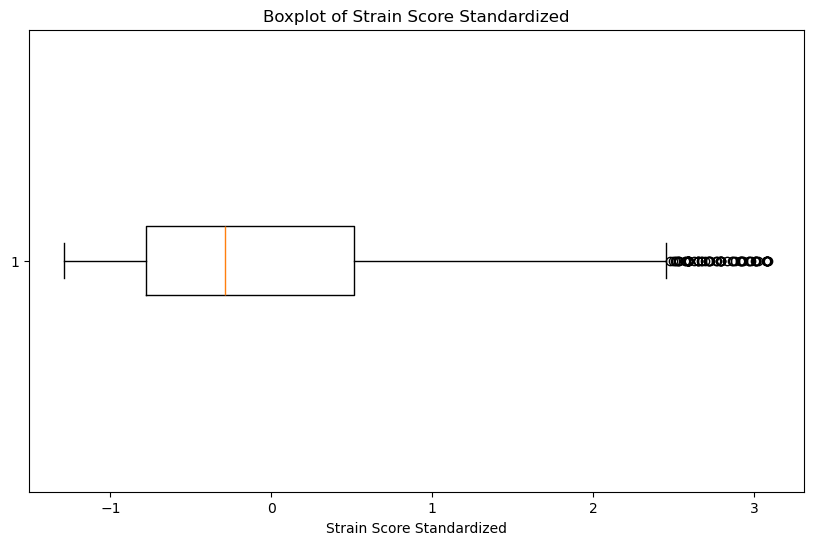

In [19]:
# boxplot of standardized strain score
plt.figure(figsize=(10, 6))
plt.boxplot(df['strain_score_std'].dropna(), vert=False)
plt.title('Boxplot of Strain Score Standardized')
plt.xlabel('Strain Score Standardized')
plt.show()

In [20]:
df.shape

(1959, 149)

In [21]:
# load a csv with a rudimentary classification of variables to begin narrowing process
variables = pd.read_csv('datasets/variables.csv')
variables.head(3)

,Variable,Type,Description,Social Indicator,Financial Indicator,Neither,Indicator Type
0,state,nominal,US state (by number),False,False,True,Neither
1,county,numeric,numeric code for county,False,False,True,Neither
2,community,numeric,numeric code for community,False,False,True,Neither


In [22]:
# Drops variables that are not social nor financial indicators
variables_df = variables[variables['Indicator Type'] != 'Neither']
variables_df.shape

(93, 7)

In [23]:
# Get the list of column names from variables.csv
column_names = variables_df.iloc[:, 0].tolist()

# Filter out columns not present in the original DataFrame
column_names = [col for col in column_names if col in df.columns]

# Create a new DataFrame with only the desired columns
filtered_df = df[column_names].copy()

# Add the 'strain_score_std' column from df to filtered_df
filtered_df['strain_score_std'] = df['strain_score_std']

# Display the shape of the filtered DataFrame
filtered_df.shape


(1959, 92)

In [24]:
# Rename df for simplicity
df = filtered_df
df.head()

,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,PctUsePubTrans,PolicOperBudg,PolicBudgPerPop,ViolentCrimesPerPop,strain_score_std
0,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,11980,100.0,75122,89.24,1.55,70.20,23.62,1.03,18.39,79584,29711,30233,13600,5725,27101,5115.0,22838,227,1.96,5.81,9.90,48.18,2.70,64.55,14.65,28.82,5.49,50.73,3.67,26.38,5.22,4.47,3.22,91.43,90.17,95.78,95.81,44.56,58.88,1277,8.69,13.00,20.99,30.93,0.93,1.39,2.24,3.30,85.68,1.37,91.01,3.12,37.50,0.00,0.28,215900,262600,326900,685,1001,1001,1001,23.8,21.1,14.0,11,0,10.66,53.72,65.29,78.09,89.14,NaN,NaN,NaN,NaN,NaN,NaN,9.63,NaN,NaN,41.02,-0.576686
1,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,23123,100.0,47917,78.99,1.11,64.11,35.50,2.75,22.85,55323,20148,20191,18137,0,20074,5250.0,12222,885,3.98,5.61,13.72,29.89,2.43,61.96,12.26,29.28,6.39,37.64,4.23,27.99,6.45,5.42,3.11,86.91,85.33,96.82,86.46,51.14,62.43,1920,5.21,8.65,13.33,22.50,0.43,0.72,1.11,1.87,87.79,1.81,84.88,0.00,18.33,0.31,0.14,136300,164200,199900,467,560,672,627,27.6,20.7,12.5,0,0,8.30,77.17,71.27,90.22,96.12,NaN,NaN,NaN,NaN,NaN,NaN,3.84,NaN,NaN,127.56,-0.698307
3,2.40,1.70,97.35,0.50,0.70,12.55,25.20,12.19,17.57,0,0.0,20580,68.15,0.24,38.95,39.48,11.71,18.33,26501,10810,10909,9984,4941,3541,2451.0,4391,2831,17.23,11.05,33.68,10.81,9.86,54.74,31.22,27.43,26.76,22.71,10.98,28.15,14.47,12.91,2.98,64.02,62.36,65.38,67.43,59.59,70.27,339,13.86,13.86,15.34,15.34,0.28,0.28,0.31,0.31,94.98,0.56,54.89,2.54,57.85,7.00,0.87,36400,49600,66500,195,250,309,333,28.7,20.6,14.5,0,0,2.04,88.71,56.70,90.17,96.24,NaN,NaN,NaN,NaN,NaN,NaN,3.31,NaN,NaN,306.64,-0.421366
4,2.76,0.53,89.16,1.17,0.52,24.46,40.53,28.69,12.65,0,0.0,17390,69.33,0.55,42.82,32.16,11.21,14.43,24018,8483,9009,887,4425,3352,3000.0,1328,2855,29.99,12.15,23.06,25.28,9.08,52.44,6.89,36.54,10.94,27.80,7.51,50.66,11.64,9.73,2.98,58.59,55.20,66.51,79.17,61.22,68.94,196,46.94,56.12,67.86,69.90,0.82,0.98,1.18,1.22,94.64,0.39,53.57,3.90,42.64,7.45,0.82,30600,43200,59500,202,283,362,332,32.2,23.2,12.9,2,0,1.74,73.75,42.22,60.34,89.02,NaN,NaN,NaN,NaN,NaN,NaN,0.38,NaN,NaN,NaN,-0.472035
5,2.45,2.51,95.65,0.90,0.95,18.09,32.89,20.04,13.26,140494,100.0,21577,75.78,1.00,41.15,29.31,7.12,14.09,27705,11878,12029,7382,10264,10753,7192.0,8104,23223,17.78,8.76,23.03,20.66,5.72,59.02,14.31,26.83,14.72,23.42,11.40,33.32,14.46,13.04,2.89,71.94,69.79,79.76,75.33,62.96,70.52,2091,21.33,30.56,38.02,45.48,0.32,0.45,0.57,0.68,96.87,0.60,55.50,2.09,26.22,6.13,0.31,37700,53900,73100,215,280,349,340,26.4,17.3,11.7,327,4,1.49,64.35,42.29,70.61,85.66,NaN,NaN,NaN,NaN,NaN,NaN,0.97,NaN,NaN,442.95,-0.421776


In [25]:
# Evaluate columns with null entries
df.isna().sum()

householdsize               0
racepctblack                0
racePctWhite                0
racePctAsian                0
racePctHisp                 0
agePct12t21                 0
agePct12t29                 0
agePct16t24                 0
agePct65up                  0
numbUrban                   0
pctUrban                    0
medIncome                   0
pctWWage                    0
pctWFarmSelf                0
pctWInvInc                  0
pctWSocSec                  0
pctWPubAsst                 0
pctWRetire                  0
medFamInc                   0
perCapInc                   0
whitePerCap                 0
blackPerCap                 0
indianPerCap                0
AsianPerCap                 0
OtherPerCap                 1
HispPerCap                  0
NumUnderPov                 0
PctPopUnderPov              0
PctLess9thGrade             0
PctNotHSGrad                0
PctBSorMore                 0
PctUnemployed               0
PctEmploy                   0
PctEmplMan

In [26]:
# Eliminate the entry with a null value in 'OtherPerCap'
df = df.dropna(subset=['OtherPerCap'])
               
# Subset the DataFrame to include only columns without nulls
df = df[df.columns[df.notna().all()]]

In [27]:
#Identify numeric columns
columns = df.select_dtypes(include=['number']).columns.tolist()

# Calculate correlations with 'strain_score_std'
corr = df[columns].corr()['strain_score_std']

# Order by absolute value of correlations
corr_abs = corr.abs().sort_values(ascending=False)

# Create a list with variable name ordered by absolute correlation
correlation_list = [(col, corr[col]) for col in corr_abs.index]
correlation_list = pd.DataFrame(correlation_list, columns=['Variable', 'Correlation'])

In [28]:
# Merge variables with corelation_list 
variables = pd.merge(variables, correlation_list, on='Variable')

# Create a columns with the absolute value of the correlation
variables['abs_correlation'] = variables['Correlation'].abs()

# Sort variables df by absolute value of the correlation
variables = variables.sort_values(by='abs_correlation', ascending=False)

In [29]:
variables.head(3)

,Variable,Type,Description,Social Indicator,Financial Indicator,Neither,Indicator Type,Correlation,abs_correlation
81,PctUsePubTrans,numeric,percent of people using public transit for com...,True,False,False,Social,0.324207,0.324207
10,pctUrban,numeric,percentage of people living in areas classifie...,True,False,False,Social,0.306770,0.306770
56,PctRecImmig10,numeric,percent of population who have immigrated with...,True,False,False,Social,0.268038,0.268038


In [30]:
# Normalize all variables
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [31]:
def calculate_vif(df):
    """
    Calculate data frame VIF's.
    """
    vif_data = pd.DataFrame()
    vif_data["Variable"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

def eliminate_high_vif(df, threshold=10):
    """
    Iteratively eliminate max VIF score until all values are below the threshold
    """
    while True:
        # Calculate VIF scores
        vif_df = calculate_vif(df)
        
        # Verify if VIFs are below threshold
        if (vif_df["VIF"] <= threshold).all():
            break
        
        # Drop max VIF score above threshold
        max_vif_feature = vif_df.loc[vif_df["VIF"].idxmax(), "Variable"]
        df = df.drop(columns=[max_vif_feature])
        
    return df

# Drop dependent variable
X = df.drop(columns=['strain_score_std'])  

# Run independent variables through elimination process
X_filtered = eliminate_high_vif(X, threshold=10)

# Print finalized variables and VIFs
vif_df = calculate_vif(X_filtered)
print(vif_df)

                 Variable       VIF
0            racepctblack  3.044667
1            racePctAsian  2.678666
2             racePctHisp  4.215426
3             agePct16t24  4.840448
4              agePct65up  6.682805
5                pctUrban  5.089538
6            pctWFarmSelf  3.257000
7             blackPerCap  3.346034
8            indianPerCap  1.764719
9             AsianPerCap  3.707450
10            OtherPerCap  2.997408
11             HispPerCap  8.040104
12          PctUnemployed  9.845820
13            PctEmplManu  4.916898
14         MalePctDivorce  9.614562
15               NumImmig  5.774228
16         PctImmigRecent  5.248782
17         PctRecentImmig  6.022576
18       PctVacantBoarded  3.208676
19         PctVacMore6Mos  9.797576
20         PctHousNoPhone  8.823400
21         PctWOFullPlumb  3.337527
22         OwnOccLowQuart  6.066288
23  MedOwnCostPctIncNoMtg  7.812438
24          NumInShelters  6.140907
25         PctUsePubTrans  2.733559


In [32]:
# Get finalized feature names
filtered_columns = X_filtered.columns

# Convert filtered_columns to list and append strain score std
columns = filtered_columns.tolist() + ['strain_score_std']

# Subset df to relevant columns and preview
df = df[columns]
df.head(3)

,racepctblack,racePctAsian,racePctHisp,agePct16t24,agePct65up,pctUrban,pctWFarmSelf,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,PctUnemployed,PctEmplManu,MalePctDivorce,NumImmig,PctImmigRecent,PctRecentImmig,PctVacantBoarded,PctVacMore6Mos,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,MedOwnCostPctIncNoMtg,NumInShelters,PctUsePubTrans,strain_score_std
0,0.014172,0.112659,0.018493,0.106646,0.189200,1.0,0.237366,0.064115,0.011927,0.255272,0.037336,0.417911,0.038747,0.262609,0.055268,0.000603,0.135169,0.067834,0.078215,0.435135,0.000000,0.052533,0.414227,0.293233,0.00047,0.177250,0.162847
1,0.008276,0.059377,0.007670,0.099017,0.303659,1.0,0.169985,0.085503,0.000000,0.189083,0.038321,0.223650,0.029650,0.212797,0.087507,0.000912,0.081039,0.031364,0.000000,0.192507,0.012982,0.026266,0.250104,0.180451,0.00000,0.070679,0.135070
2,0.017586,0.008184,0.006094,0.128009,0.311289,0.0,0.036753,0.047068,0.010294,0.033354,0.017891,0.080351,0.279987,0.607962,0.476108,0.000153,0.215586,0.020423,0.063675,0.692697,0.293132,0.163227,0.044126,0.330827,0.00000,0.060924,0.198319


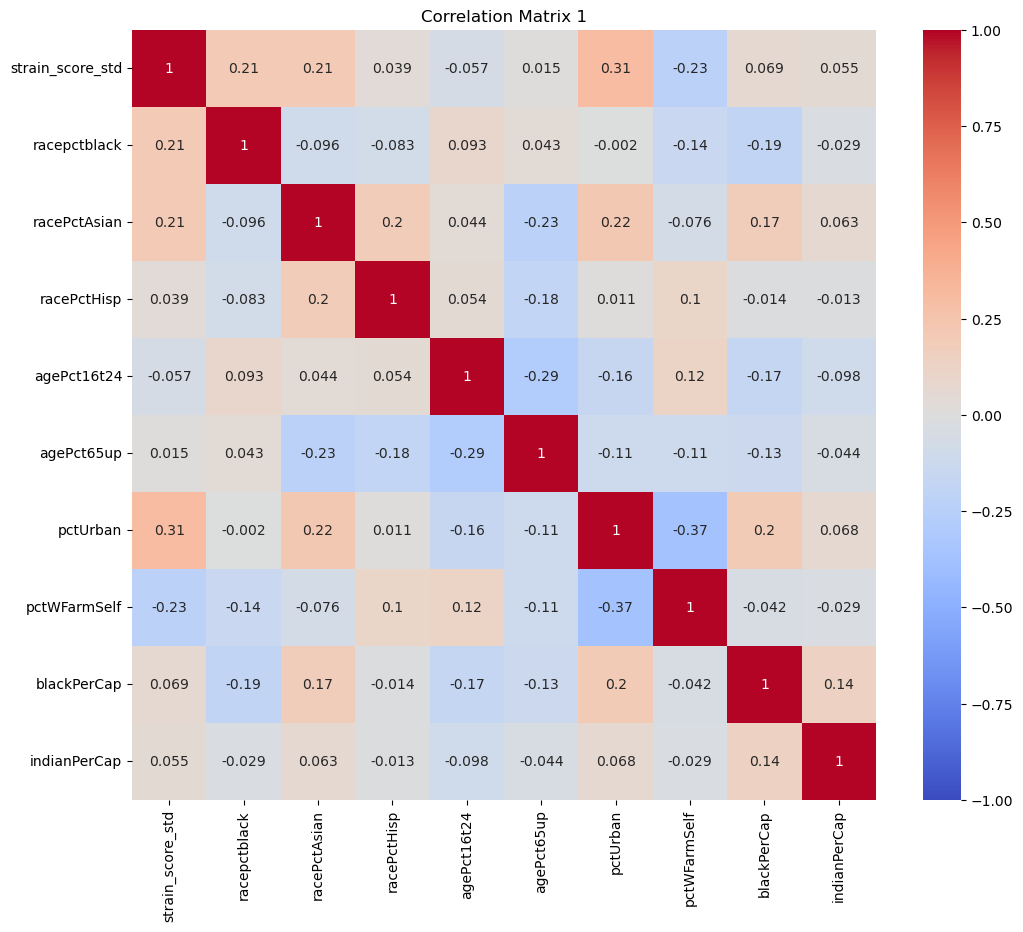

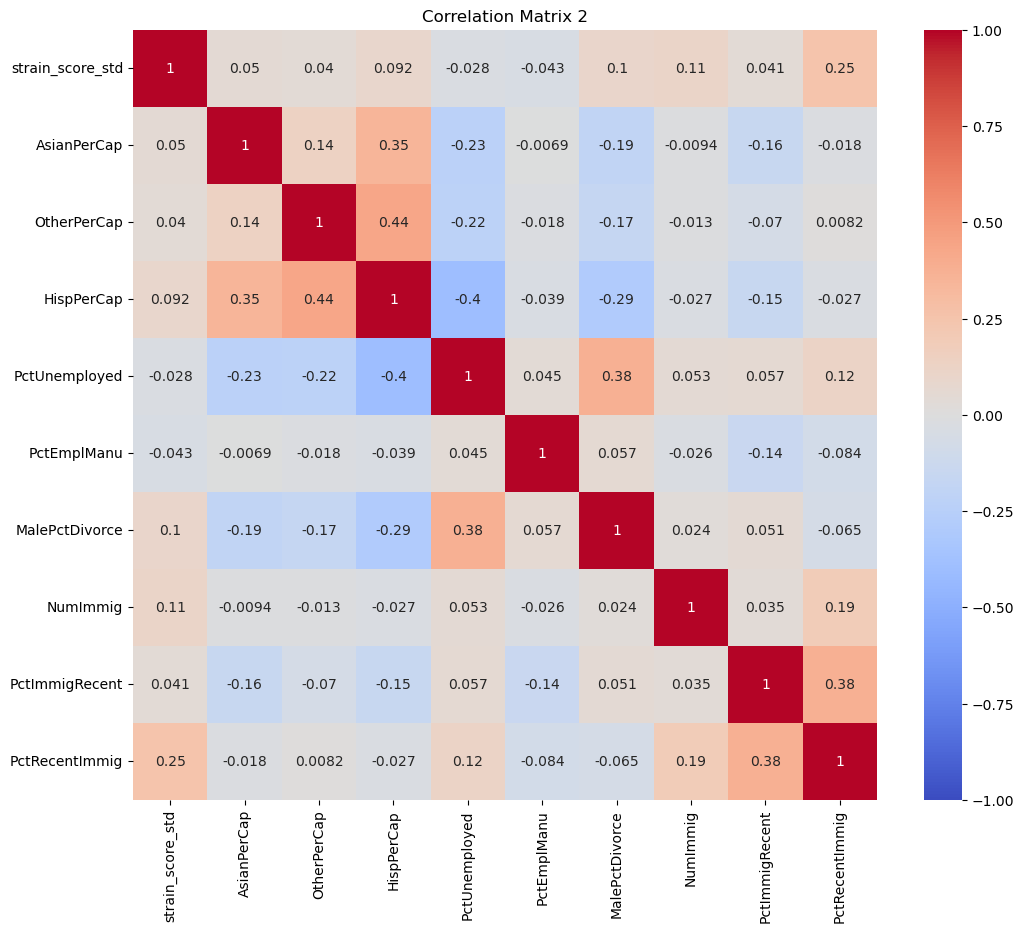

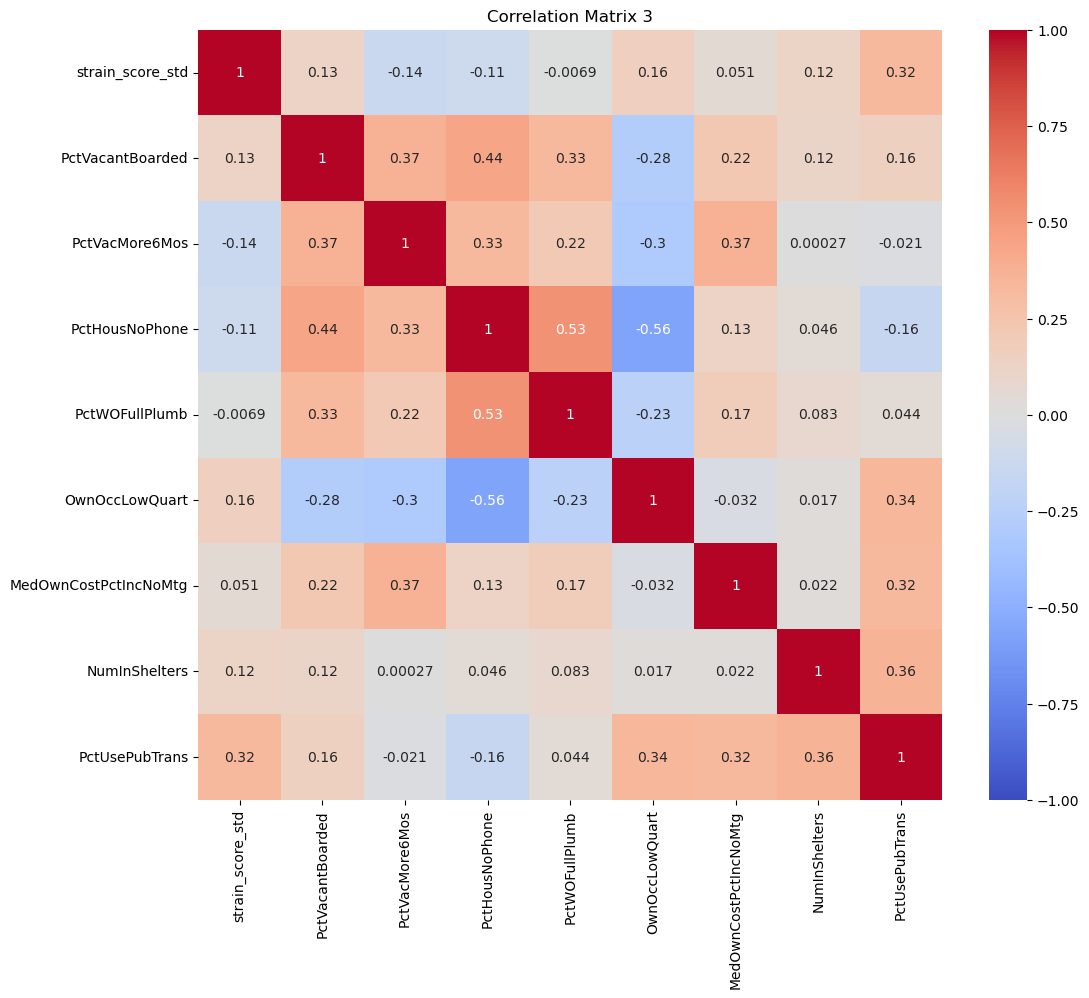

In [33]:
features_per_matrix = 9

# Get features to visualize
other_features = [col for col in df.columns if col != 'strain_score_std']

# Create chunks of features
feature_chunks = [other_features[i:i + features_per_matrix] for i in range(0, len(other_features), features_per_matrix)]

# Create and display correlation matrices for each chunk, ensuring 'strain_score_std' is the first column
for i, chunk in enumerate(feature_chunks):
    # Add 'strain_score_std' as the first column
    chunk_with_strain = ['strain_score_std'] + chunk
    
    # Create a DataFrame with 'strain_score_std' and the current chunk of features
    corr_df = df[chunk_with_strain]

    # Calculate the correlation matrix
    corr_matrix = corr_df.corr()

    # Plot the correlation matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
    plt.title(f'Correlation Matrix {i + 1}')
    plt.show()

In [34]:
df.head(3)

,racepctblack,racePctAsian,racePctHisp,agePct16t24,agePct65up,pctUrban,pctWFarmSelf,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,PctUnemployed,PctEmplManu,MalePctDivorce,NumImmig,PctImmigRecent,PctRecentImmig,PctVacantBoarded,PctVacMore6Mos,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,MedOwnCostPctIncNoMtg,NumInShelters,PctUsePubTrans,strain_score_std
0,0.014172,0.112659,0.018493,0.106646,0.189200,1.0,0.237366,0.064115,0.011927,0.255272,0.037336,0.417911,0.038747,0.262609,0.055268,0.000603,0.135169,0.067834,0.078215,0.435135,0.000000,0.052533,0.414227,0.293233,0.00047,0.177250,0.162847
1,0.008276,0.059377,0.007670,0.099017,0.303659,1.0,0.169985,0.085503,0.000000,0.189083,0.038321,0.223650,0.029650,0.212797,0.087507,0.000912,0.081039,0.031364,0.000000,0.192507,0.012982,0.026266,0.250104,0.180451,0.00000,0.070679,0.135070
2,0.017586,0.008184,0.006094,0.128009,0.311289,0.0,0.036753,0.047068,0.010294,0.033354,0.017891,0.080351,0.279987,0.607962,0.476108,0.000153,0.215586,0.020423,0.063675,0.692697,0.293132,0.163227,0.044126,0.330827,0.00000,0.060924,0.198319


In [35]:
# Remove outliers for variables of interest
for col in df.columns: df = removeOutliersIQR(df, col)

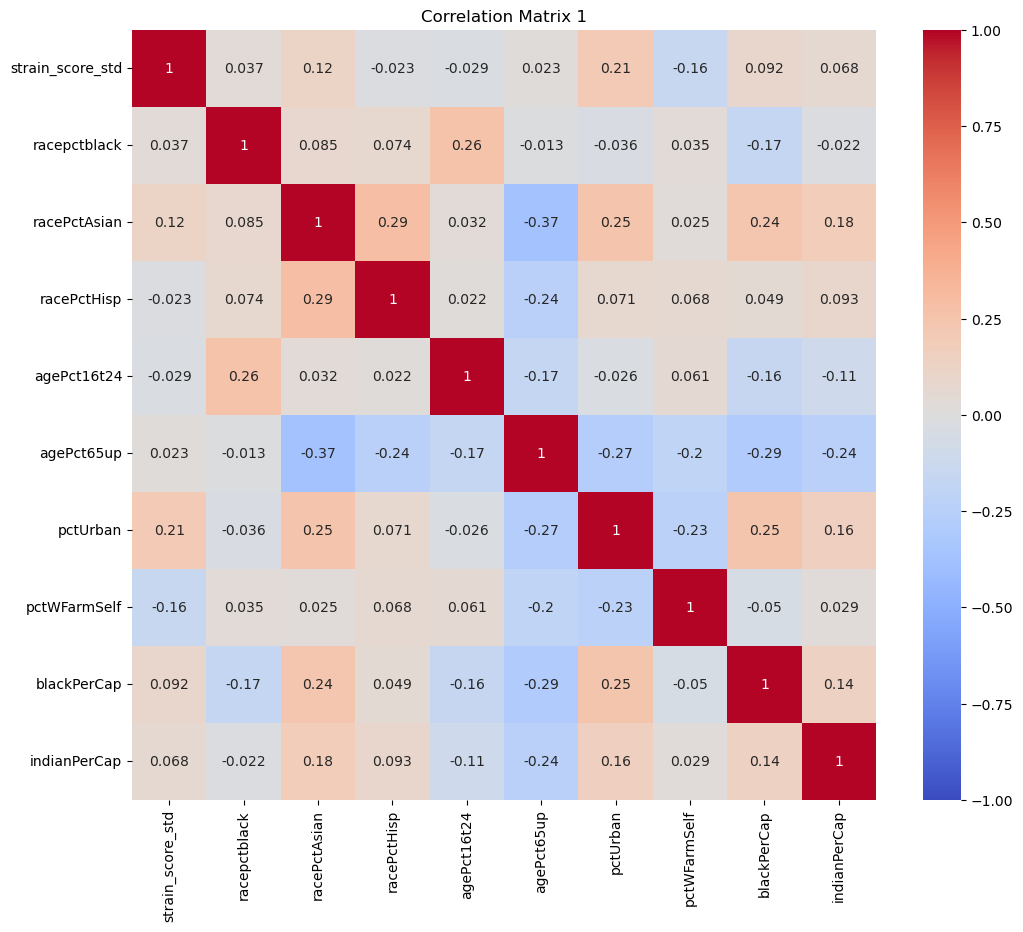

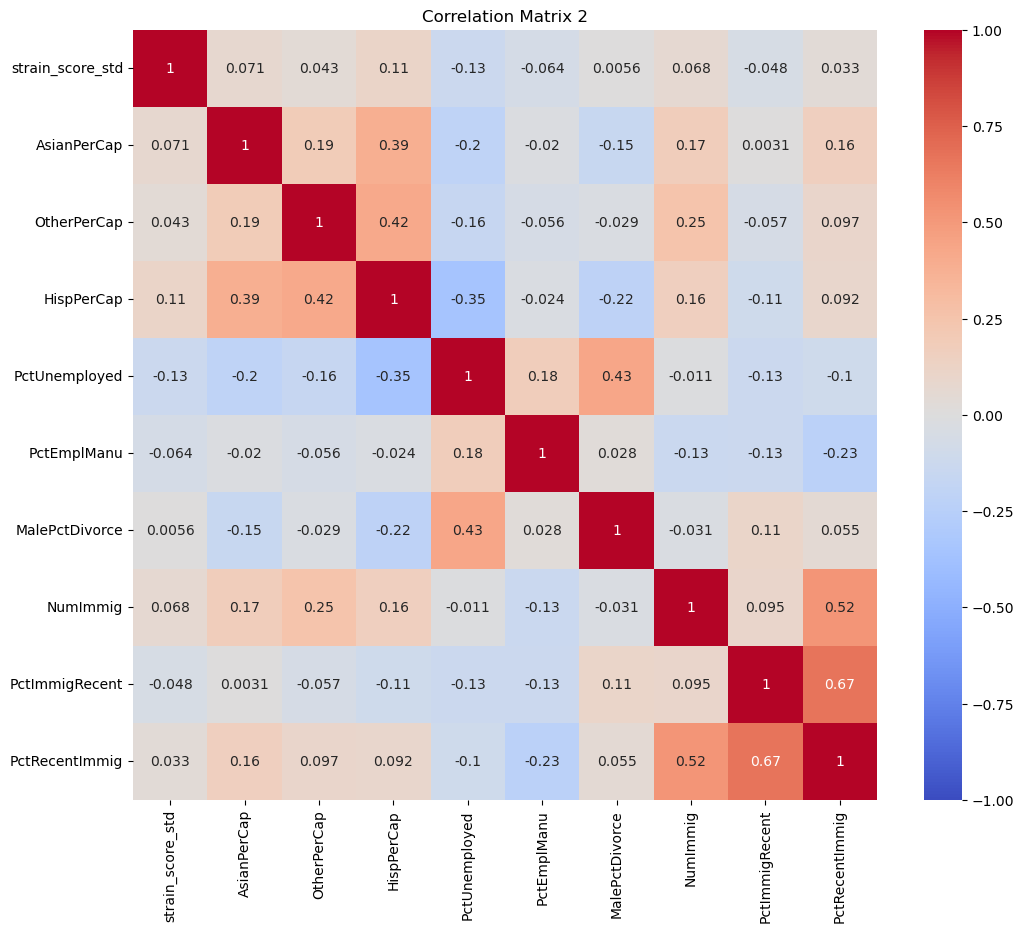

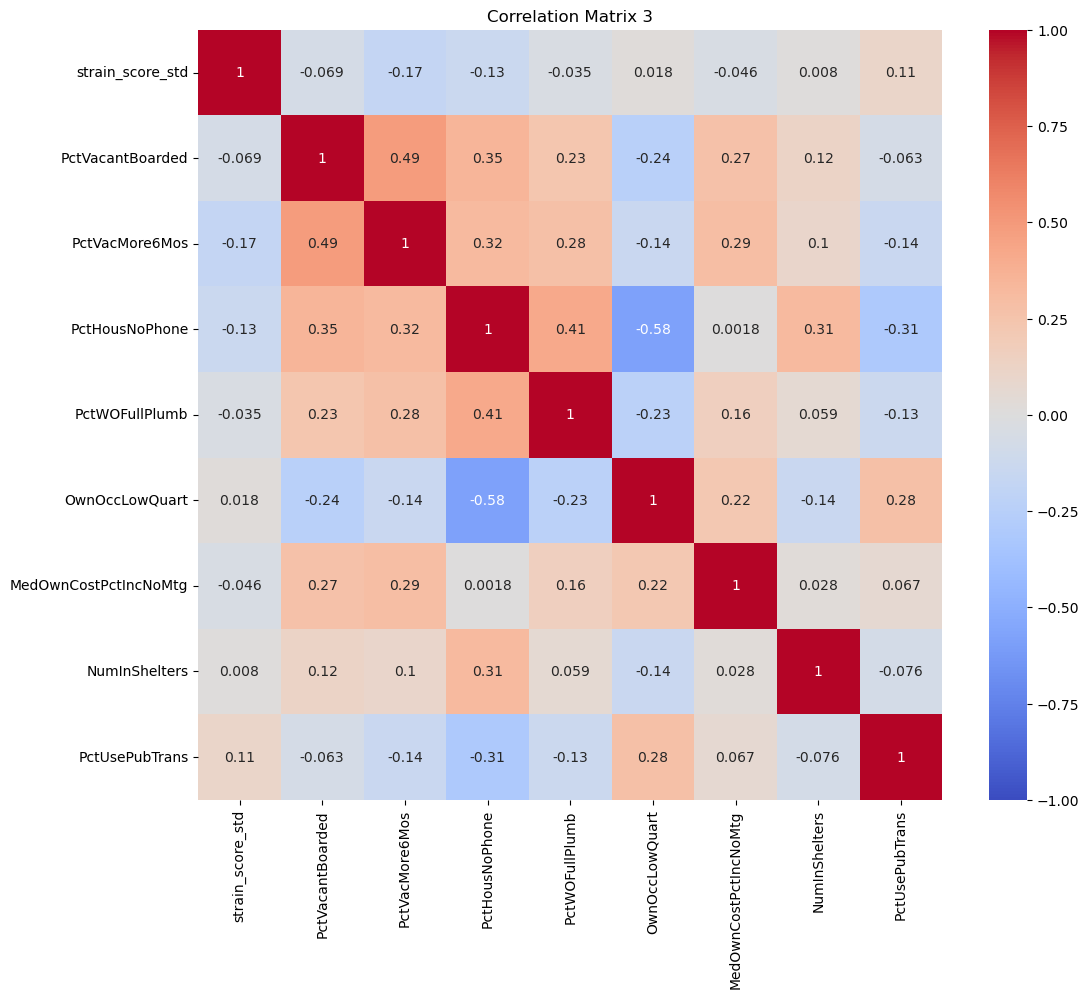

In [36]:
# Step 1: Define the umber of features per matrix (excluding 'strain_score_std')
features_per_matrix = 9  # 9 other features + 1 'strain_score_std'

# Step 2: Get the list of features excluding 'strain_score_std'
other_features = [col for col in df.columns if col != 'strain_score_std']

# Step 3: Split the ordered features into chunks of 9
feature_chunks = [other_features[i:i + features_per_matrix] for i in range(0, len(other_features), features_per_matrix)]

# Step 4: Create and display correlation matrices for each chunk, ensuring 'strain_score_std' is the first column
for i, chunk in enumerate(feature_chunks):
    # Add 'strain_score_std' as the first column
    chunk_with_strain = ['strain_score_std'] + chunk
    
    # Create a DataFrame with 'strain_score_std' and the current chunk of features
    corr_df = df[chunk_with_strain]

    # Calculate the correlation matrix
    corr_matrix = corr_df.corr()

    # Plot the correlation matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
    plt.title(f'Correlation Matrix {i + 1}')
    plt.show()

In [37]:
df.head()

,racepctblack,racePctAsian,racePctHisp,agePct16t24,agePct65up,pctUrban,pctWFarmSelf,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,PctUnemployed,PctEmplManu,MalePctDivorce,NumImmig,PctImmigRecent,PctRecentImmig,PctVacantBoarded,PctVacMore6Mos,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,MedOwnCostPctIncNoMtg,NumInShelters,PctUsePubTrans,strain_score_std
1,0.008276,0.059377,0.007670,0.099017,0.303659,1.0,0.169985,0.085503,0.000000,0.189083,0.038321,0.223650,0.029650,0.212797,0.087507,0.000912,0.081039,0.031364,0.000000,0.192507,0.012982,0.026266,0.250104,0.180451,0.000000,0.070679,0.135070
2,0.017586,0.008184,0.006094,0.128009,0.311289,0.0,0.036753,0.047068,0.010294,0.033354,0.017891,0.080351,0.279987,0.607962,0.476108,0.000153,0.215586,0.020423,0.063675,0.692697,0.293132,0.163227,0.044126,0.330827,0.000000,0.060924,0.198319
9,0.130651,0.012885,0.044867,0.178366,0.246527,1.0,0.235835,0.035338,0.019013,0.085782,0.038445,0.083114,0.190027,0.485202,0.504893,0.000441,0.278581,0.038658,0.069441,0.496393,0.330402,0.056285,0.035466,0.210526,0.000043,0.000000,0.357878
13,0.026068,0.034825,0.015026,0.114954,0.171982,1.0,0.136294,0.061946,0.025760,0.137842,0.069358,0.126519,0.088275,0.406628,0.317789,0.000380,0.157101,0.018964,0.052143,0.289077,0.014657,0.065666,0.119795,0.142857,0.000000,0.061660,0.483247
17,0.016655,0.034999,0.009457,0.128009,0.060849,1.0,0.182236,0.077645,0.021210,0.134847,0.012803,0.179220,0.056941,0.362443,0.303972,0.000629,0.217452,0.026988,0.002006,0.144032,0.012144,0.026266,0.170517,0.105263,0.000000,0.048592,0.153758


In [38]:
X = df.drop(columns=['strain_score_std'])
X_filtered = eliminate_high_vif(X, threshold=10)
print(X_filtered.columns)
filtered_columns = X_filtered.columns
columns = filtered_columns.tolist() + ['strain_score_std']
df = df[columns]

vif_df = calculate_vif(X_filtered)
print(vif_df)

Index(['racepctblack', 'racePctAsian', 'racePctHisp', 'agePct65up', 'pctUrban',
       'pctWFarmSelf', 'blackPerCap', 'indianPerCap', 'AsianPerCap',
       'OtherPerCap', 'PctUnemployed', 'PctEmplManu', 'NumImmig',
       'PctImmigRecent', 'PctRecentImmig', 'PctVacantBoarded',
       'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart',
       'MedOwnCostPctIncNoMtg', 'NumInShelters', 'PctUsePubTrans'],
      dtype='object')
                 Variable       VIF
0            racepctblack  2.213443
1            racePctAsian  5.240118
2             racePctHisp  2.591139
3              agePct65up  6.709440
4                pctUrban  4.992669
5            pctWFarmSelf  5.048429
6             blackPerCap  7.321031
7            indianPerCap  4.046413
8             AsianPerCap  5.380099
9             OtherPerCap  4.911092
10          PctUnemployed  9.168829
11            PctEmplManu  7.577588
12               NumImmig  3.735423
13         PctImmigRecent  7.698998
14         PctRecentImmig  9.44

In [39]:
df.shape

(410, 23)